In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#class to select keypoints in image
class KeyPointSelector:
    points = []
    def __init__(self, img, name):
        self.points = []
        self.img = img
        self.name = name

    def select_key_points(self):
        cv2.imshow(self.name, self.img)
        cv2.setMouseCallback(self.name, self.select_point)
        cv2.waitKey(0)
        self.plot_image()

    def plot_image(self):
        image = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        plt.title(self.name)
        plt.imshow(image)
        plt.show()

    def select_point(self, event, x, y, flags, params):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.points.append((x,y))
            cv2.circle(self.img, (x,y), 5, (0,0,0), cv2.FILLED)
            cv2.putText(self.img, str(len(self.points)), (x+5,y+5), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 2)

In [7]:
def get_key_points(path, name):
    key_frame = cv2.imread(path)
    key_frame_points = KeyPointSelector(key_frame, name)
    key_frame_points.select_key_points()

    return np.array(key_frame_points.points)

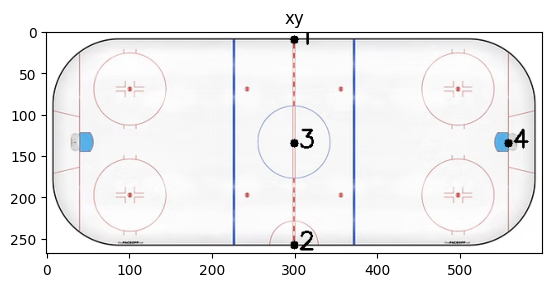

[[300  10]
 [300 258]
 [300 135]
 [559 135]]


In [8]:
path = './rink.png'
points = get_key_points(path, 'xy')
print(points)

In [ ]:
y_conversion = 25.9 / (points[1][1] - points[0][1])
x_conversion = ((60.96 / 2) - 3.3528) / (points[3][0] - points[2][0])
np.save('meters_conversion.npy', np.array([x_conversion, y_conversion]))
print(x_conversion, y_conversion)

248
259
0.10473822393822395 0.10443548387096774
